In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [44]:
file_name = "./data/full_bus_data_high_confidence.csv"

bus_data = pd.read_csv(file_name)

/var/folders/xt/5my4_t657l5dvcsk9ybkb_ww0000gn/T/ipykernel_73449/2233828969.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  bus_data = pd.read_csv(file_name)


In [45]:
bus_data["10_min_time"] = pd.to_datetime(bus_data["Time"])
bus_data["10_min_time"] = bus_data["10_min_time"].dt.floor("10T")
bus_data_copy = bus_data

# drop outliers (display these later)
super_delays = bus_data[bus_data["Min Delay"]>60].dropna()
super_delays = super_delays[super_delays["Min Delay"]<1000]
bus_data = bus_data[bus_data["Min Delay"]<=60] 

mean_bus_data = bus_data.groupby("10_min_time")[["Min Delay", "Min Gap"]].mean().reset_index()
super_means = super_delays.groupby("10_min_time")[["Min Delay", "Min Gap"]].mean().reset_index()

display(mean_bus_data)

/var/folders/xt/5my4_t657l5dvcsk9ybkb_ww0000gn/T/ipykernel_73449/3461497850.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bus_data["10_min_time"] = pd.to_datetime(bus_data["Time"])
/var/folders/xt/5my4_t657l5dvcsk9ybkb_ww0000gn/T/ipykernel_73449/3461497850.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  bus_data["10_min_time"] = bus_data["10_min_time"].dt.floor("10T")


,10_min_time,Min Delay,Min Gap
0,2025-03-01 00:00:00,15.418692,30.037418
1,2025-03-01 00:10:00,14.882917,29.673704
2,2025-03-01 00:20:00,15.044955,29.124875
3,2025-03-01 00:30:00,15.091667,29.300000
4,2025-03-01 00:40:00,14.816504,28.552660
...,...,...,...
139,2025-03-01 23:10:00,15.497031,30.128075
140,2025-03-01 23:20:00,15.080895,29.577453
141,2025-03-01 23:30:00,15.220366,29.930788
142,2025-03-01 23:40:00,15.204789,29.229562


In [20]:
time = mean_bus_data["10_min_time"].dt.strftime("%I:%M %p")
time_ticks  = time[::12]
delay = mean_bus_data["Min Delay"]
gap = mean_bus_data["Min Gap"]
super_time = super_means["10_min_time"].dt.strftime("%I:%M %p")
super_delay = super_means["Min Delay"]
super_gap = super_means["Min Gap"]

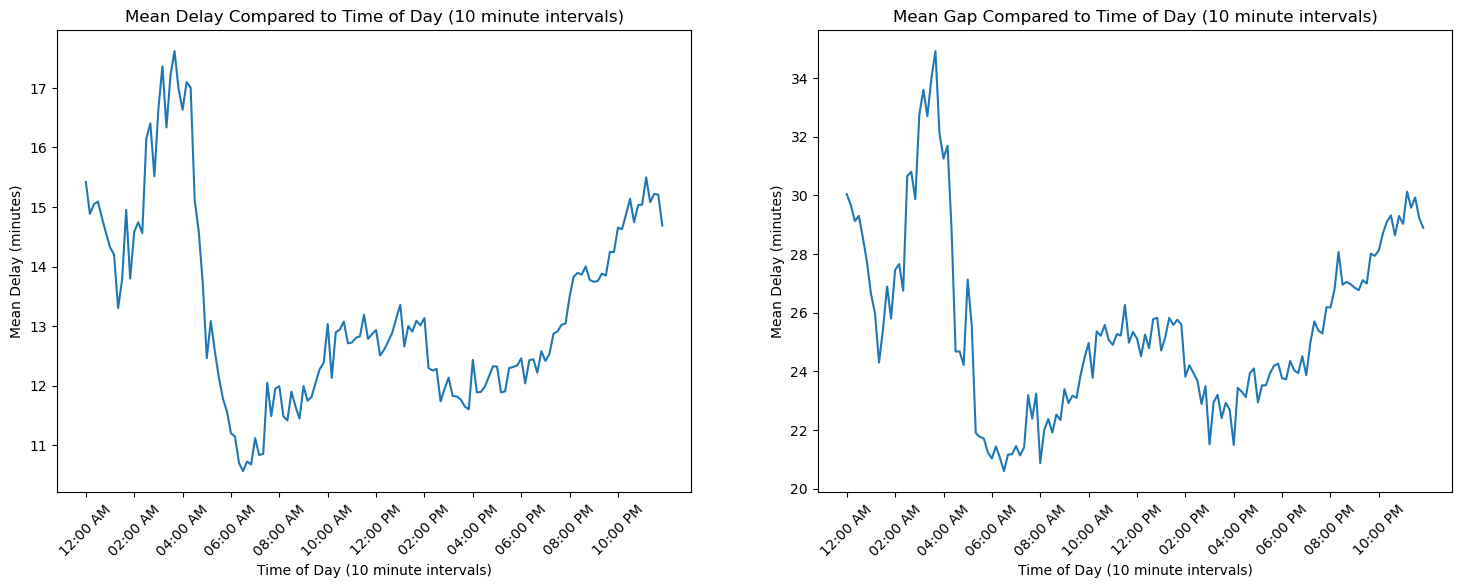

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (18, 6))

axes[0].plot(time, delay, linestyle='-')
axes[0].set_title("Mean Delay Compared to Time of Day (10 minute intervals)")
axes[0].set_xlabel("Time of Day (10 minute intervals)")
axes[0].set_ylabel("Mean Delay (minutes)")
axes[0].set_xticks(time_ticks)
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(time, gap, linestyle='-')
axes[1].set_title("Mean Gap Compared to Time of Day (10 minute intervals)")
axes[1].set_xlabel("Time of Day (10 minute intervals)")
axes[1].set_ylabel("Mean Delay (minutes)")
axes[1].set_xticks(time_ticks)
axes[1].tick_params(axis='x', rotation=45)

## Analysis for super delays (>60 mins)

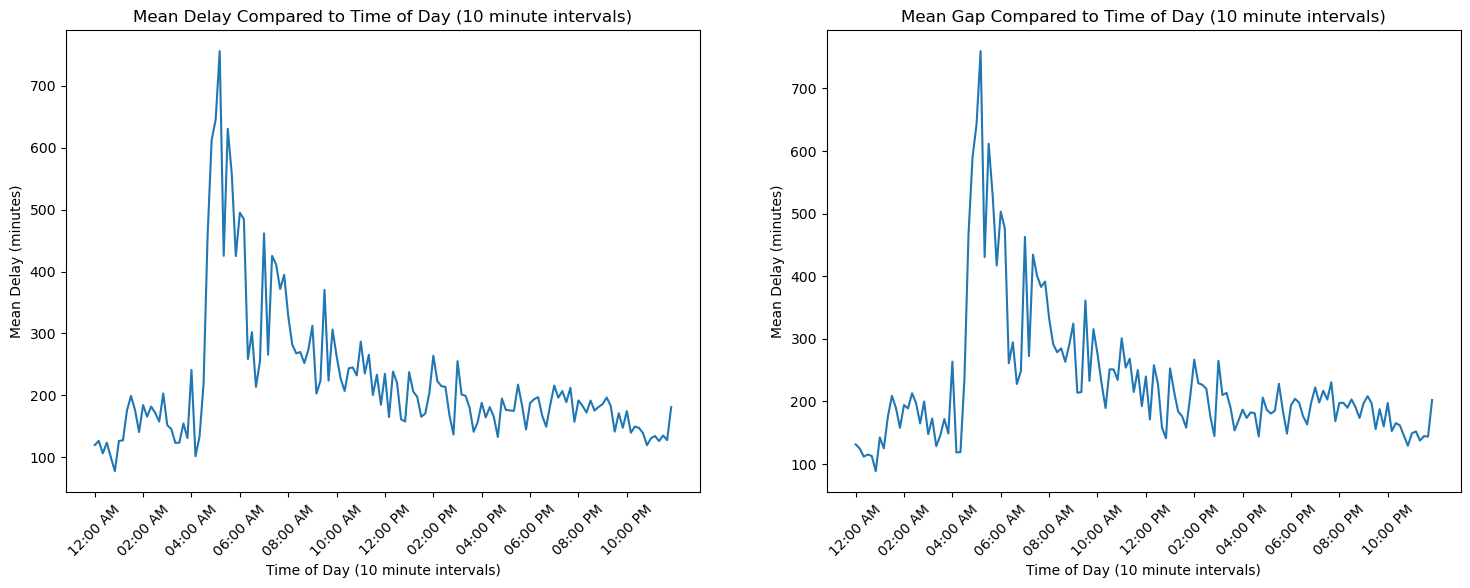

In [22]:
fig, axes = plt.subplots(1, 2, figsize = (18, 6))

axes[0].plot(super_time, super_delay, linestyle='-')
axes[0].set_title("Mean Delay Compared to Time of Day (10 minute intervals)")
axes[0].set_xlabel("Time of Day (10 minute intervals)")
axes[0].set_ylabel("Mean Delay (minutes)")
axes[0].set_xticks(time_ticks)
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(super_time, super_gap, linestyle='-')
axes[1].set_title("Mean Gap Compared to Time of Day (10 minute intervals)")
axes[1].set_xlabel("Time of Day (10 minute intervals)")
axes[1].set_ylabel("Mean Delay (minutes)")
axes[1].set_xticks(time_ticks)
axes[1].tick_params(axis='x', rotation=45)

## Without removing outliers

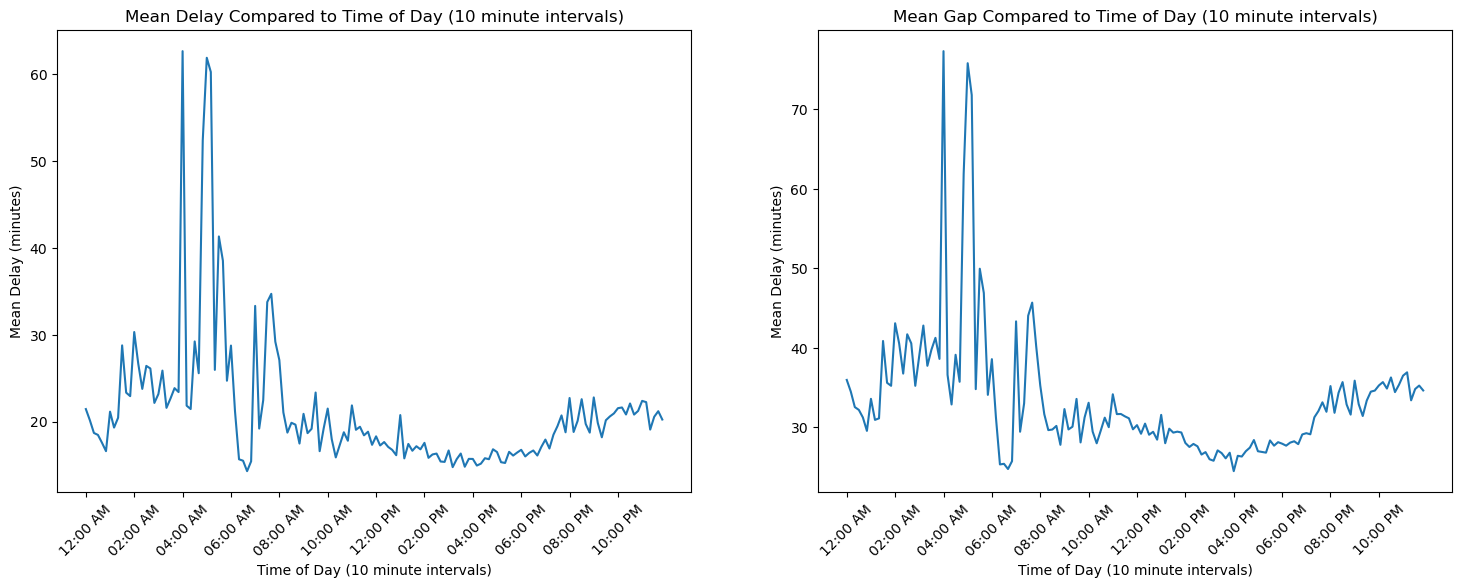

In [23]:
mean_bus_data = bus_data_copy.groupby("10_min_time")[["Min Delay", "Min Gap"]].mean().reset_index()
time = mean_bus_data["10_min_time"].dt.strftime("%I:%M %p")
time_ticks  = time[::12]
delay = mean_bus_data["Min Delay"]
gap = mean_bus_data["Min Gap"]

fig, axes = plt.subplots(1, 2, figsize = (18, 6))

axes[0].plot(time, delay, linestyle='-')
axes[0].set_title("Mean Delay Compared to Time of Day (10 minute intervals)")
axes[0].set_xlabel("Time of Day (10 minute intervals)")
axes[0].set_ylabel("Mean Delay (minutes)")
axes[0].set_xticks(time_ticks)
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(time, gap, linestyle='-')
axes[1].set_title("Mean Gap Compared to Time of Day (10 minute intervals)")
axes[1].set_xlabel("Time of Day (10 minute intervals)")
axes[1].set_ylabel("Mean Delay (minutes)")
axes[1].set_xticks(time_ticks)
axes[1].tick_params(axis='x', rotation=45)

## By day of the week

,Day,Min Delay,Min Gap
1,Monday,12.353572,23.831244
5,Tuesday,12.164068,23.457769
6,Wednesday,12.134499,23.443425
4,Thursday,12.188358,23.381693
0,Friday,12.265754,23.769938
2,Saturday,13.408536,25.998885
3,Sunday,14.025152,27.198465


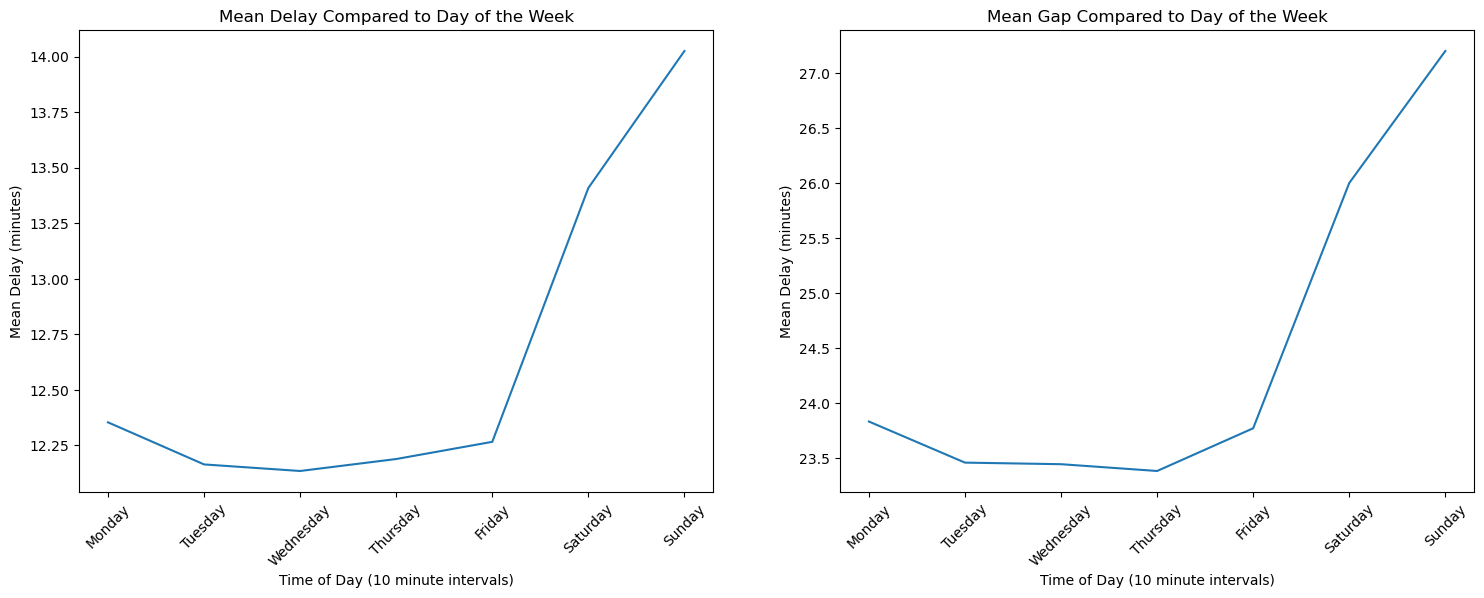

In [43]:
new_data  = bus_data_copy[bus_data_copy["Min Delay"]<=60]

mean_bus_data = new_data.groupby("Day")[["Min Delay", "Min Gap"]].mean().reset_index()
mean_bus_data = mean_bus_data.reindex([1, 5, 6, 4, 0, 2, 3])
time = mean_bus_data["Day"]
delay = mean_bus_data["Min Delay"]
gap = mean_bus_data["Min Gap"]

display(mean_bus_data)

fig, axes = plt.subplots(1, 2, figsize = (18, 6))

axes[0].plot(time, delay, linestyle='-')
axes[0].set_title("Mean Delay Compared to Day of the Week")
axes[0].set_xlabel("Time of Day (10 minute intervals)")
axes[0].set_ylabel("Mean Delay (minutes)")
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(time, gap, linestyle='-')
axes[1].set_title("Mean Gap Compared to Day of the Week")
axes[1].set_xlabel("Time of Day (10 minute intervals)")
axes[1].set_ylabel("Mean Delay (minutes)")
axes[1].tick_params(axis='x', rotation=45)

,Day,Min Delay,Min Gap
1,Monday,273.464470,279.113049
5,Tuesday,257.030715,264.185579
6,Wednesday,262.481121,268.137300
4,Thursday,260.087091,268.087091
0,Friday,260.785950,266.757409
2,Saturday,279.999371,284.262429
3,Sunday,259.534646,267.849745


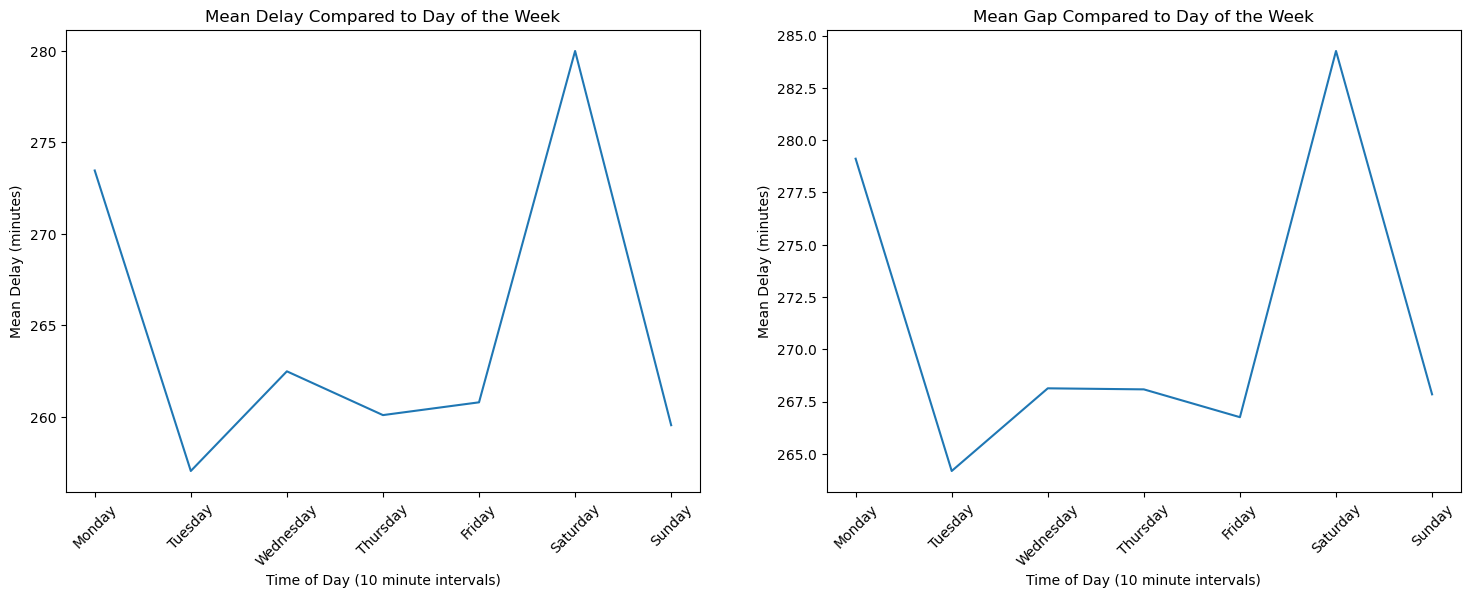

In [46]:
new_data  = bus_data_copy[bus_data_copy["Min Delay"]>60]

mean_bus_data = new_data.groupby("Day")[["Min Delay", "Min Gap"]].mean().reset_index()
mean_bus_data = mean_bus_data.reindex([1, 5, 6, 4, 0, 2, 3])
time = mean_bus_data["Day"]
delay = mean_bus_data["Min Delay"]
gap = mean_bus_data["Min Gap"]

display(mean_bus_data)

fig, axes = plt.subplots(1, 2, figsize = (18, 6))

axes[0].plot(time, delay, linestyle='-')
axes[0].set_title("Mean Delay Compared to Day of the Week")
axes[0].set_xlabel("Time of Day (10 minute intervals)")
axes[0].set_ylabel("Mean Delay (minutes)")
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(time, gap, linestyle='-')
axes[1].set_title("Mean Gap Compared to Day of the Week")
axes[1].set_xlabel("Time of Day (10 minute intervals)")
axes[1].set_ylabel("Mean Delay (minutes)")
axes[1].tick_params(axis='x', rotation=45)